# Mundo 13

### Leitura e extração de dados

https://data.worldbank.org/

Esses dados podem servir pra montar um ótimo portfólio diferente. 

In [3]:
from pandas_datareader import wb
from datetime import datetime

In [4]:
indicadores = wb.get_indicators() #todos os indicadores do MErcado mundial
indicadores

,id,name,unit,source,sourceNote,sourceOrganization,topics
0,1.0.HCount.1.90usd,Poverty Headcount ($1.90 a day),,LAC Equity Lab,The poverty headcount index measures the propo...,b'LAC Equity Lab tabulations of SEDLAC (CEDLAS...,Poverty
1,1.0.HCount.2.5usd,Poverty Headcount ($2.50 a day),,LAC Equity Lab,The poverty headcount index measures the propo...,b'LAC Equity Lab tabulations of SEDLAC (CEDLAS...,Poverty
2,1.0.HCount.Mid10to50,Middle Class ($10-50 a day) Headcount,,LAC Equity Lab,The poverty headcount index measures the propo...,b'LAC Equity Lab tabulations of SEDLAC (CEDLAS...,Poverty
3,1.0.HCount.Ofcl,Official Moderate Poverty Rate-National,,LAC Equity Lab,The poverty headcount index measures the propo...,b'LAC Equity Lab tabulations of data from Nati...,Poverty
4,1.0.HCount.Poor4uds,Poverty Headcount ($4 a day),,LAC Equity Lab,The poverty headcount index measures the propo...,b'LAC Equity Lab tabulations of SEDLAC (CEDLAS...,Poverty
...,...,...,...,...,...,...,...
20875,w_F_skl,Annual wage for skilled female workers in US$,,Gender Disaggregated Labor Database (GDLD),,b'',
20876,w_M_nsk,Annual wage for unskilled male workers in US$,,Gender Disaggregated Labor Database (GDLD),,b'',
20877,w_M_skl,Annual wage for skilled male workers in US$,,Gender Disaggregated Labor Database (GDLD),,b'',
20878,wpremia_F,Wage Premia for Females (the ratio of skilled ...,,Gender Disaggregated Labor Database (GDLD),,b'',


In [5]:
indicadores.head(50)

,id,name,unit,source,sourceNote,sourceOrganization,topics
0,1.0.HCount.1.90usd,Poverty Headcount ($1.90 a day),,LAC Equity Lab,The poverty headcount index measures the propo...,b'LAC Equity Lab tabulations of SEDLAC (CEDLAS...,Poverty
1,1.0.HCount.2.5usd,Poverty Headcount ($2.50 a day),,LAC Equity Lab,The poverty headcount index measures the propo...,b'LAC Equity Lab tabulations of SEDLAC (CEDLAS...,Poverty
2,1.0.HCount.Mid10to50,Middle Class ($10-50 a day) Headcount,,LAC Equity Lab,The poverty headcount index measures the propo...,b'LAC Equity Lab tabulations of SEDLAC (CEDLAS...,Poverty
3,1.0.HCount.Ofcl,Official Moderate Poverty Rate-National,,LAC Equity Lab,The poverty headcount index measures the propo...,b'LAC Equity Lab tabulations of data from Nati...,Poverty
4,1.0.HCount.Poor4uds,Poverty Headcount ($4 a day),,LAC Equity Lab,The poverty headcount index measures the propo...,b'LAC Equity Lab tabulations of SEDLAC (CEDLAS...,Poverty
5,1.0.HCount.Vul4to10,Vulnerable ($4-10 a day) Headcount,,LAC Equity Lab,The poverty headcount index measures the propo...,b'LAC Equity Lab tabulations of SEDLAC (CEDLAS...,Poverty
6,1.0.PGap.1.90usd,Poverty Gap ($1.90 a day),,LAC Equity Lab,The poverty gap captures the mean aggregate in...,b'LAC Equity Lab tabulations of SEDLAC (CEDLAS...,Poverty
7,1.0.PGap.2.5usd,Poverty Gap ($2.50 a day),,LAC Equity Lab,The poverty gap captures the mean aggregate in...,b'LAC Equity Lab tabulations of SEDLAC (CEDLAS...,Poverty
8,1.0.PGap.Poor4uds,Poverty Gap ($4 a day),,LAC Equity Lab,The poverty gap captures the mean aggregate in...,b'LAC Equity Lab tabulations of SEDLAC (CEDLAS...,Poverty
9,1.0.PSev.1.90usd,Poverty Severity ($1.90 a day),,LAC Equity Lab,The poverty severity index combines informatio...,b'LAC Equity Lab tabulations of SEDLAC (CEDLAS...,Poverty


In [6]:
matches = wb.search('gdp.*capita.*const')

matches

,id,name,unit,source,sourceNote,sourceOrganization,topics
691,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",,LAC Equity Lab,GDP per capita based on purchasing power parit...,b'World Development Indicators (World Bank)',Economy & Growth
10629,NY.GDP.PCAP.KD,GDP per capita (constant 2015 US$),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
10631,NY.GDP.PCAP.KN,GDP per capita (constant LCU),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
10633,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2017 internation...",,World Development Indicators,GDP per capita based on purchasing power parit...,"b'International Comparison Program, World Bank...",Economy & Growth
10634,NY.GDP.PCAP.PP.KD.87,"GDP per capita, PPP (constant 1987 internation...",,WDI Database Archives,,b'',


In [7]:
pobreza = wb.download(indicator='1.0.HCount.1.90usd',
                      country=['MEX','BRA'],
                      start=2000, end=2022)

pobreza

1.0.HCount.1.90usd
country year                    
Brazil  2014            3.663256
        2013                 NaN
        2012            4.591671
        2011            5.500478
        2010                 NaN
        2009            6.175147
        2008            6.286798
        2007            7.602658
        2006            7.944849
        2005            9.553495
        2004           11.036233
        2003           12.709325
        2002           12.310864
        2001           13.622047
        2000                 NaN
Mexico  2014            5.653357
        2013                 NaN
        2012            5.944242
        2011                 NaN
        2010            6.593106
        2009                 NaN
        2008            7.191222
        2007                 NaN
        2006            6.033171
        2005            8.658200
        2004            8.299212
        2003                 NaN
        2002            9.224252
        2001                 NaN
        2000           11.721977

https://www.worldbank.org/en/topic/poverty/lac-equity-lab1/overview

# Link com o código dos países:

https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes

In [17]:
pib_percapta = wb.download(indicator= 'NY.GDP.PCAP.KD',
                    country= ['BRA','USA','ARG','MEX'],
                    start = 1980, end = 2023)

print(pib_percapta)

                    NY.GDP.PCAP.KD
country       year                
Argentina     2021    12402.490791
              2020    11341.268366
              2019    12716.224204
              2018    13105.397163
              2017    13595.037355
...                            ...
United States 1984    33906.351244
              1983    31893.199049
              1982    30775.441389
              1981    31640.677787
              1980    31161.930725

[168 rows x 1 columns]


In [18]:
aumento_em_40_anos = pib_percapta.groupby('country').first()/pib_percapta.groupby('country').last()-1


aumento_em_40_anos

,NY.GDP.PCAP.KD
country,
Argentina,0.207530
Brazil,0.330800
Mexico,0.239711
United States,0.984971


In [19]:
pib_percapta.loc['Brazil']

,NY.GDP.PCAP.KD
year,
2021,8537.939220
2020,8204.202726
2019,8592.221538
2018,8553.876187
2017,8470.950789
2016,8426.853352
2015,8783.225984
2014,9183.470768
2013,9216.143360


# Exercícios

* Exercício 62: Busque os dados no banco mundial da evolução da emissão de carbono no mundo que tem como nome "CO2 emissions (kt)" desde 1990. Obs: para puxar dados agregados do mundo, a sigla a ser colocada em Country é "1W"

In [13]:
#gabarito 62

matches = wb.search('co2')

matches.tail(50)

,id,name,unit,source,sourceNote,sourceOrganization,topics
2372,CC.NCO.GHG.IL,Non-CO2 GHG emissions by sector (Mt CO2 eq) - ...,,Country Climate and Development Report (CCDR),Total non-CO2 emissions (including LUCF) are g...,"b'Climate Watch. 2020. Washington, DC: World R...",
2373,CC.NCO.GHG.IP,Non-CO2 GHG emissions by sector (Mt CO2 eq) - ...,,Country Climate and Development Report (CCDR),Industrial Processes sector non-CO2 emissions ...,"b'Climate Watch. 2020. Washington, DC: World R...",
2374,CC.NCO.GHG.LU,Non-CO2 GHG emissions by sector (Mt CO2 eq) - ...,,Country Climate and Development Report (CCDR),,b'',
2375,CC.NCO.GHG.OF,Non-CO2 GHG emissions by sector (Mt CO2 eq) - ...,,Country Climate and Development Report (CCDR),Other fuel combustion sector non-CO2 emissions...,"b'Climate Watch. 2020. Washington, DC: World R...",
2376,CC.NCO.GHG.WA,Non-CO2 GHG emissions by sector (Mt CO2 eq) - ...,,Country Climate and Development Report (CCDR),Waste sector non-CO2 emissions are generated f...,"b'Climate Watch. 2020. Washington, DC: World R...",
6091,EN.ATM.CO2E.CP.KT,CO2 emissions from cement production (thousand...,,Africa Development Indicators,Carbon dioxide emissions from cement productio...,"b'Food and Agriculture Organization, electroni...",
6092,EN.ATM.CO2E.EG.ZS,CO2 intensity (kg per kg of oil equivalent ene...,,World Development Indicators,Carbon dioxide emissions from solid fuel consu...,"b'Carbon Dioxide Information Analysis Center, ...",Climate Change ; Environment
6093,EN.ATM.CO2E.FF.KT,"CO2 emissions from fossil-fuels, total (thousa...",,Africa Development Indicators,Fossil fuel is any hydrocarbon deposit that ca...,"b'Food and Agriculture Organization, electroni...",
6094,EN.ATM.CO2E.FF.ZS,CO2 emissions from fossil-fuels (% of total),,Africa Development Indicators,Fossil fuel is any hydrocarbon deposit that ca...,"b'Food and Agriculture Organization, electroni...",
6095,EN.ATM.CO2E.GDP,"CO2 emissions, industrial (kg per 1987 US$ of ...",,WDI Database Archives,,b'',


c:\Users\Tiago\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas_datareader\wb.py:592: UserWarning: Non-standard ISO country codes: 1W
  warnings.warn(


              EN.ATM.CO2E.KT
country year                
World   2021             NaN
        2020             NaN
        2019    3.434401e+07
        2018    3.428935e+07
        2017    3.351454e+07
        2016    3.301856e+07
        2015    3.299554e+07
        2014    3.319873e+07
        2013    3.311938e+07
        2012    3.246032e+07
        2011    3.202111e+07
        2010    3.104348e+07
        2009    2.926738e+07
        2008    2.959575e+07
        2007    2.936878e+07
        2006    2.830293e+07
        2005    2.741433e+07
        2004    2.643436e+07
        2003    2.528535e+07
        2002    2.416526e+07
        2001    2.384577e+07
        2000    2.344543e+07
        1999    2.272012e+07
        1998    2.261371e+07
        1997    2.249205e+07
        1996    2.211061e+07
        1995    2.165284e+07
        1994    2.105295e+07
        1993    2.093712e+07
        1992    2.079696e+07
        1991    2.076690e+07
        1990    2.062527e+07


<AxesSubplot: xlabel='year'>

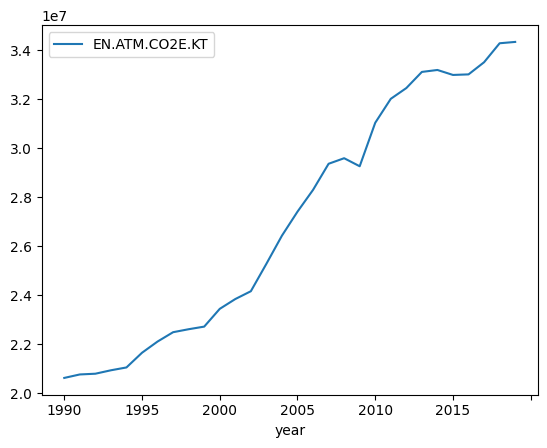

In [15]:
co2 = wb.download(indicator='EN.ATM.CO2E.KT', 
                      country=['1W'], 
                      start=1990, end=2022)

print(co2)

co2 = co2.dropna()
co2 = co2.droplevel(level = 0)
co2 = co2.sort_index()
co2
co2.plot()